In [1]:
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd

In [3]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [4]:
train_dataset = train.flow_from_directory(r'D:\AILA\TrainingData\AllDatasets\train',
                                         target_size = (29,29),
                                          batch_size = 200
                                         )

validation_dataset = train.flow_from_directory(r'D:\AILA\TrainingData\AllDatasets\val',
                                         target_size = (29,29),
                                          batch_size = 3
                                         )


Found 15752 images belonging to 4 classes.
Found 4202 images belonging to 4 classes.


In [5]:
train_dataset.class_indices

{'Heavy': 0, 'Low': 1, 'Moderate': 2, 'Severe': 3}

In [6]:
train_dataset.classes

array([0, 0, 0, ..., 3, 3, 3])

In [7]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (29,29,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                       #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])
                                                           
                                                           


In [8]:
model.compile(loss = 'binary_crossentropy',
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1),
            metrics=['accuracy'])

In [9]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3, 
                      epochs = 50,
                      validation_data = validation_dataset
                      
                     )

Epoch 1/50
3/3 [==============================] - 5s 2s/step - loss: 150881.9688 - accuracy: 0.5142 - val_loss: 266.9868 - val_accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 3s 2s/step - loss: 116.6893 - accuracy: 0.5833 - val_loss: 0.6702 - val_accuracy: 0.7500
Epoch 3/50
3/3 [==============================] - 3s 2s/step - loss: 0.5988 - accuracy: 0.7500 - val_loss: 0.5630 - val_accuracy: 0.7500
Epoch 4/50
3/3 [==============================] - 4s 2s/step - loss: 0.5627 - accuracy: 0.7500 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 5/50
3/3 [==============================] - 3s 2s/step - loss: 0.5623 - accuracy: 0.7500 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 6/50
3/3 [==============================] - 3s 2s/step - loss: 0.5623 - accuracy: 0.7500 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 7/50
3/3 [==============================] - 3s 2s/step - loss: 0.5623 - accuracy: 0.7500 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 8/50
3/3 [================

In [10]:
dir_path = r"C:\Users\topow\Desktop\prediction_grids\1000m\new_grids"

dir_path

'C:\\Users\\topow\\Desktop\\prediction_grids\\1000m\\new_grids'

Heavy
_BN107_LC08_L2SP_041036_20210316_20210328_02_T1_SR_B1.TIF
<PIL.Image.Image image mode=RGB size=29x29 at 0x25A32566CD0>


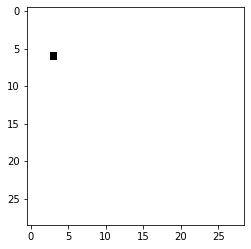

Heavy
_BN107_LC08_L2SP_041036_20210316_20210328_02_T1_SR_B2.TIF
<PIL.Image.Image image mode=RGB size=29x29 at 0x25A3284F850>


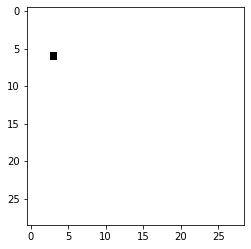

Heavy
_BO107_LC08_L2SP_041036_20210316_20210328_02_T1_SR_B1.TIF
<PIL.Image.Image image mode=RGB size=29x29 at 0x25A332D8100>


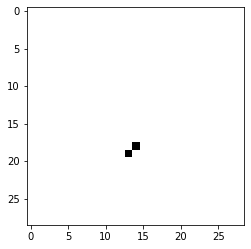

we have analyzed: 500images
we have analyzed: 1000images
Heavy
_BX113_LC08_L2SP_041036_20210316_20210328_02_T1_SR_B1.TIF
<PIL.Image.Image image mode=RGB size=29x29 at 0x25A33286700>


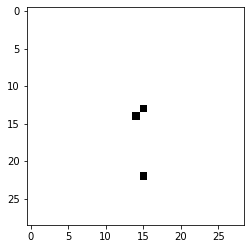

Heavy
_BX113_LC08_L2SP_041036_20210316_20210328_02_T1_SR_B2.TIF
<PIL.Image.Image image mode=RGB size=29x29 at 0x25A325B5520>


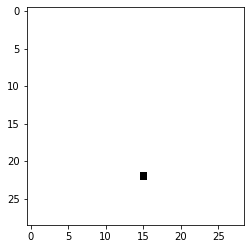

we have analyzed: 1500images
we have analyzed: 2000images


In [11]:
count = 0
capture_list = []

# {'Heavy': 0, 'Low': 1, 'Moderate': 2, 'Severe': 3}
for i in os.listdir(dir_path):
    list_val = []
    
    img = image.load_img(dir_path +'//' + i, target_size =(29,29,3))
    
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    
    
    if count == 500: 
        print("===========================================")
        print("we have analyzed: " + str(count) + "images")
        print("===========================================")
    if count == 1000: 
        print("===========================================")
        print("we have analyzed: " + str(count) + "images")
        print("===========================================")

    if count == 1500: 
        print("===========================================")
        print("we have analyzed: " + str(count) + "images")
        print("===========================================")

    if count == 2000: 
        print("===========================================")
        print("we have analyzed: " + str(count) + "images")
        print("===========================================")

    if count == 2500: 
        print("===========================================")
        print("we have analyzed: " + str(count) + "images")
        print("===========================================")
    if count == 3500: 
        print("===========================================")
        print("we have analyzed: " + str(count) + "images")
        print("===========================================")
    
    if val == 0: 
        print("Heavy")
        
        
        val_type = "Heavy"
        
        print(i)
        print(img)
        plt.imshow(img)
        plt.show()
        txt = i
        endloc= txt.find("_", 1, 10)
        grid = txt[1:endloc]
        a = i.split("_")
        date = a[5]
        grid = a[1]
        txt = i
        list_val.append([val_type,i,grid,date])
        capture_list.append(list_val)
        
        
        
    if val == 1: 
        
        print("Low")
        
        
        val_type = "Low"
        list_val = []
        print(i)
        print(img)
        plt.imshow(img)
        plt.show()
        txt = i
        endloc= txt.find("_", 1, 10)
        grid = txt[1:endloc]
        a = i.split("_")
        date = a[5]
        grid = a[1]
        txt = i
        list_val.append([val_type,i,grid,date])
        capture_list.append(list_val)
        
    if val == 2: 
        print ("Moderate")
        
        val_type = "Moderate"
        list_val = []
        print(i)
        print(img)
        plt.imshow(img)
        plt.show()
        txt = i
        endloc= txt.find("_", 1, 10)
        grid = txt[1:endloc]
        a = i.split("_")
        date = a[5]
        grid = a[1]
        txt = i
        list_val.append([val_type,i,grid,date])
        capture_list.append(list_val)
    if val == 3: 
        print("Severe")
        
        val_type = "Severe"
        list_val = []
        print(i)
        print(img)
        plt.imshow(img)
        plt.show()
        txt = i
        endloc= txt.find("_", 1, 10)
        grid = txt[1:endloc]
        a = i.split("_")
        date = a[5]
        grid = a[1]
        txt = i
        list_val.append([val_type,i,grid,date])
        capture_list.append(list_val)
        
    count = count + 1 
   

In [12]:
newlist = list()
for i in capture_list: 
    newlist.append(i[0])
    
products_list = newlist
df_columns = ['type','filename' ,'grid','date']
df = pd.DataFrame (products_list, columns = df_columns)


In [13]:
df.head(1)

,type,filename,grid,date
0,Heavy,_BN107_LC08_L2SP_041036_20210316_20210328_02_T...,BN107,20210316
